In [1]:
%load_ext autoreload
%autoreload 2
from helper import *
%config InlineBackend.figure_format='retina'

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as pe
from matplotlib.lines import Line2D

cmap = ["#FD6467", "#C6CDF7","#9c1d18", "#D8A499", "#D67236" ]

Get the baseline data

In [2]:
alldata = abcd_data()
alldata_1 = get_data_with_followups(alldata, followups = '1y_follow_up')
abcd_baseline = abcd_data(measurement = 'baseline', load = False, df = alldata_1)
baseline_clean = prepare_data(abcd_baseline)
item_list = filter_polychoric_corr(baseline_clean, print_corr = False)

In [3]:
aggregate_dict = {"cbcl_q8182_steals": ['cbcl_q81_p', 'cbcl_q82_p'], 
                  "cbcl_q165797_attacks/threatens/bullies": ['cbcl_q57_p', 'cbcl_q16_p', 'cbcl_q97_p'],
                  "cbcl_q56cf_stomach_issues":['cbcl_q56c_p', 'cbcl_q56f_p'],
                  "cbcl_q5355_weight_problems":['cbcl_q53_p', 'cbcl_q55_p'],
                  "cbcl_q4070_hallucinaitons": ['cbcl_q70_p', 'cbcl_q40_p'],
                  "cbcl_q2548_peer_problems": ['cbcl_q25_p', 'cbcl_q48_p'],
                  "cbcl_q222328_disobeys_rules": ['cbcl_q28_p', 'cbcl_q23_p', 'cbcl_q22_p'],
                  "cbcl_q21106_destroys": ['cbcl_q20_p', 'cbcl_q106_p', 'cbcl_q21_p'],
                  "cbcl_q081078_distracted/hyperactive": ['cbcl_q10_p', 'cbcl_q78_p', 'cbcl_q08_p']}

baseline_data = aggregate_items(baseline_clean, item_list, aggregate_dict)
baseline_polycorr = common.polychoric.polychoric_correlation_serial(get_question_items(baseline_data, 'cbcl_q').to_numpy().T,0,3)


## Sex differences
Compare factor scores from each hierarchical level in females and males to investigate if there are significant differences.

In [4]:
baseline_sex_corr, factor_scores_F, factor_scores_M = sex_corr(baseline_data, 6)
baseline_sex_corr.to_latex(buf= 'final_results/Baseline_SexCorrelation.tex')
baseline_sex_corr.to_csv('final_results/Baseline_SexCorrelation', index=False)


/var/folders/sk/_dzt21lj39qgwpf96_02xs8h0000gp/T/ipykernel_44357/2064710589.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  baseline_sex_corr.to_latex(buf= 'final_results/Baseline_SexCorrelation.tex')


In [5]:
baseline_sex_corr

,Mean_F,SD_F,Mean_M,SD_M,t-value,Cohen's d,adj. p-value
factor_1_1,-0.103521,0.911117,0.094333,1.065891,-10.517558,-0.199544,<.001
factor_2_1,-0.164340,0.841286,0.149754,1.104202,-16.823247,-0.319986,<.001
factor_2_2,-0.004493,0.984990,0.004094,1.013467,-0.454217,-0.008592,ns
factor_3_1,-0.142211,0.834305,0.129589,1.114332,-14.512004,-0.276127,<.001
factor_3_2,0.034207,0.996878,-0.031171,1.001820,3.460180,0.065420,<.001
factor_3_3,-0.136423,0.895523,0.124315,1.071470,-13.910995,-0.264059,<.001
factor_4_1,-0.141250,0.839871,0.128713,1.110729,-14.412115,-0.274169,<.001
factor_4_2,0.041008,1.011683,-0.037368,0.987751,4.149120,0.078393,<.001
factor_4_3,-0.117558,0.916628,0.107124,1.059031,-11.960747,-0.226861,<.001
factor_4_4,-0.081637,0.881558,0.074391,1.091544,-8.278749,-0.157267,<.001


The factor scores are not normally distributed but given the large sample size a t-test can still be used 

In [6]:
scipy.stats.normaltest(factor_scores_F, axis=0) # not normally distributed 
scipy.stats.normaltest(factor_scores_M, axis=0)

NormaltestResult(statistic=array([6318.1854224]), pvalue=array([0.]))

## Regression Analysis

Obtain the data set for gender congruency for follow up year 1

In [7]:
youth_GC = get_gender_congruency('youth', timepoint = '1_year_follow_up_y_arm_1')
parent_GC = get_gender_congruency('parent', timepoint = '1_year_follow_up_y_arm_1')


### Get Factor Scores
match the participants that filled out gender survey and run EFA on them to obtain their factor scores

In [8]:
# match the subjects of the youth and parent gender questionnaire
youth_subjects = youth_GC['src_subject_id'].to_list()
common_subjects_parent = parent_GC[parent_GC.src_subject_id.isin(youth_subjects)]
common_subjects_youth = youth_GC[youth_GC.src_subject_id.isin(common_subjects_parent['src_subject_id'].to_list())]

# match it with baseline and back (5 subjects missing in baseline due to nans)
baseline_gender = baseline_data[baseline_data.src_subject_id.isin(common_subjects_parent['src_subject_id'].to_list())]
common_baseline_gender = common_subjects_parent[common_subjects_parent.src_subject_id.isin(baseline_gender['src_subject_id'].to_list())]
baseline_gender_df = baseline_gender[baseline_gender["src_subject_id"].isin(common_baseline_gender['src_subject_id'].to_list())]
youth_gender_df = common_subjects_youth[common_subjects_youth["src_subject_id"].isin(common_baseline_gender['src_subject_id'].to_list())]
parent_gender_df = common_subjects_parent[common_subjects_parent["src_subject_id"].isin(common_baseline_gender['src_subject_id'].to_list())]

# obtain the list of subject IDs in the final df
subjectsList_df = baseline_gender_df["src_subject_id"].values


In [9]:
# get the factor scores
gb_factor_scores, gb_rotated_loadings = get_EFA_structure(baseline_gender_df, 6, 'geomin_obl', run_again = False)

# add the subject IDs
gb_factor_scores['src_subject_id'] = subjectsList_df


Prepare the dataframes and match their indices
Column 0 is female
Column 1 is male

In [10]:
# predictor: sex
X_sex = baseline_gender_df.sort_values(by=['src_subject_id'])
encode = OneHotEncoder()
rescaled_sex = X_sex["sex"].to_numpy().reshape(-1, 1)
encode.fit(rescaled_sex)
sex_X = encode.transform(rescaled_sex).toarray()

# predictor: gender congruency kid report
X_gender_kid = youth_gender_df.sort_values(by=['src_subject_id'])
gender_kid_X = get_question_items(X_gender_kid,"gish").to_numpy()

# predictor: gender congruency parent report
X_gender_parent = parent_gender_df.sort_values(by=['src_subject_id'])
gender_adult_X = get_question_items(X_gender_parent,"gish").to_numpy()

# shared predictor arrays
parent_sex_combined_X = np.hstack([gender_adult_X, sex_X])
parent_kid_combined_X = np.hstack([gender_adult_X, gender_kid_X])
kid_sex_combined_X = np.hstack([gender_kid_X, sex_X])
parent_kid_sex_combined_X = np.hstack([gender_adult_X,gender_kid_X, sex_X])


Predict Factor Using Sex

In [11]:
sex_scores, sex_weigths = predict_sex_diff(gb_factor_scores, sex_X, 'Externalizing', cv_no =100)
sex_scores.mean()
sex_weigths.mean() 

-1.3877787807814457e-17

Predict Factor Using Gender Congruency from Parent data

In [12]:
gender_parent_scores, gender_parent_weigths = predict_sex_diff(gb_factor_scores, gender_adult_X, 'Externalizing', cv_no= 100)
gender_parent_scores.mean() 
gender_parent_weigths.mean() 


-0.07948774789260754

Predict Factor Using Gender Congruency from Child data

In [17]:
gender_kid_scores, gender_kid_weigths = predict_sex_diff(gb_factor_scores, gender_kid_X, 'Externalizing', cv_no=100)
gender_kid_scores.mean() 
gender_kid_weigths.mean()

-0.06496577016896092

Look at the effect directionality of the sex on the Dimensions

In [21]:
sex_scores, sex_weigths_Ext = predict_sex_diff(gb_factor_scores, sex_X, 'Externalizing', cv_no =2)
print(f"Female effect on Externalizing: {sex_weigths_Ext[0]}, Male Effect: {sex_weigths_Ext[1]}.")

sex_scores, sex_weigths_Int = predict_sex_diff(gb_factor_scores, sex_X, 'Internalizing', cv_no =2)
print(f"Female effect on Internalizing: {sex_weigths_Int[0]}, Male Effect: {sex_weigths_Int[1]}.")

sex_scores, sex_weigths_Neuro = predict_sex_diff(gb_factor_scores, sex_X, 'Neurodevelopmental', cv_no =2)
print(f"Female effect on Neurodevelopmental: {sex_weigths_Neuro[0]}, Male Effect: {sex_weigths_Neuro[1]}.")


Female effect on Externalizing: -0.09565140055398597, Male Effect: 0.09565140055398594.
Female effect on Internalizing: 0.03675023234018695, Male Effect: -0.03675023234018694.
Female effect on Neurodevelopmental: -0.14741389479949585, Male Effect: 0.14741389479949582.


Recode Sex into one variable to include it in the interaction

In [64]:
# female coded as 1, male as 0 
recoded_sex = (rescaled_sex=='F').astype(int)


Obtain interaction of sex and gender incongruency parent report 

In [65]:
interaction_df = pd.DataFrame()

for i in range(gender_adult_X.shape[1]):
    
    combined_array = np.concatenate((recoded_sex, gender_adult_X[:,i].reshape(-1,1)), axis = 1)
    
    interaction = PolynomialFeatures(2,interaction_only=True,include_bias=False)
    interaction_terms = interaction.fit_transform(combined_array)
    
    interaction_df['gender_adult_X' + str(i)] = interaction_terms[:,2]
interaction_X = interaction_df.to_numpy()

When looking at the interaction weights, we can see that the more gender congruency increases for females (codes as 1), the lower they score on the externalizing spectrum

In [66]:
interaction_scores, interaction_weigths = predict_sex_diff(gb_factor_scores, interaction_X, 'Externalizing')
interaction_scores.mean() 
interaction_weigths.mean()


0.03495495237888721

Obtain interaction of sex and gender incongruency kid report 

In [59]:
# obtain interaction of sex and gender incongruency parent report 

kid_interaction_df = pd.DataFrame()

for i in range(gender_kid_X.shape[1]):
    
    combined_array_kid = np.concatenate((recoded_sex, gender_kid_X[:,i].reshape(-1,1)), axis = 1)
    
    interaction_kid = PolynomialFeatures(2,interaction_only=True,include_bias=False)
    interaction_terms_kid = interaction_kid.fit_transform(combined_array_kid)
    
    kid_interaction_df['gender_adult_X' + str(i)] = interaction_terms_kid[:,2]
interaction_kidX = kid_interaction_df.to_numpy()


In [60]:
interaction_scores, interaction_weigths = predict_sex_diff(gb_factor_scores, interaction_kidX, 'Neurodevelopmental')
interaction_scores.mean() 
interaction_weigths.mean()

0.07150164924089647

### Only Individual Predictors and their interaction

In [30]:
factor_list = ['Externalizing', 'Internalizing', 'Neurodevelopmental']

predictor_dict = {'Sex':sex_X, 
                  'Gender Congruency - Parent': gender_adult_X, 
                  'Gender Congruency - Kid': gender_kid_X, 
                  'Interaction Sex & GC Parent': interaction_X,
                  'Interaction Sex & GC Kid': interaction_kidX
                }

full_result_df = get_predictor_df(factor_list, predictor_dict, gb_factor_scores, full = True) 

Obtain only mean R^2 values for each factor and predictor combination

In [31]:
result_df = get_predictor_df(factor_list, predictor_dict, gb_factor_scores) 
result_df

,Factor,Predictor,R^2,adj. p-values
2,Externalizing,Gender Congruency - Kid,-0.0072,1.500000e+01
1,Externalizing,Gender Congruency - Parent,0.0096,1.633422e-02
4,Externalizing,Interaction Sex & GC Kid,0.0019,3.124213e+00
3,Externalizing,Interaction Sex & GC Parent,0.0118,9.638061e-04
0,Externalizing,Sex,0.0004,6.415009e+00
7,Internalizing,Gender Congruency - Kid,-0.0085,1.494033e+01
6,Internalizing,Gender Congruency - Parent,-0.0037,1.268981e+01
9,Internalizing,Interaction Sex & GC Kid,-0.0111,1.499996e+01
8,Internalizing,Interaction Sex & GC Parent,-0.0075,1.482949e+01
5,Internalizing,Sex,-0.0113,1.499978e+01


Simplify the adjusted p-values according to significance

In [32]:
simplified_df = result_df.rename(columns= {'adj. p-values': 'sign.'})
simplified_df['sign.'] = simplified_df['sign.'].apply(display_p_val)
simplified_df

,Factor,Predictor,R^2,sign.
2,Externalizing,Gender Congruency - Kid,-0.0072,ns
1,Externalizing,Gender Congruency - Parent,0.0096,*
4,Externalizing,Interaction Sex & GC Kid,0.0019,ns
3,Externalizing,Interaction Sex & GC Parent,0.0118,***
0,Externalizing,Sex,0.0004,ns
7,Internalizing,Gender Congruency - Kid,-0.0085,ns
6,Internalizing,Gender Congruency - Parent,-0.0037,ns
9,Internalizing,Interaction Sex & GC Kid,-0.0111,ns
8,Internalizing,Interaction Sex & GC Parent,-0.0075,ns
5,Internalizing,Sex,-0.0113,ns


In [33]:
# export the results
simplified_df.to_csv('final_results/LinearRegression_baseline', index=False)
simplified_df.to_latex(buf= 'final_results/LinearRegression_baseline.tex')


### Predictors, their Interaction and combinations
to investigate if the predictors explain the same or different parts of the variance

In [34]:
factor_list = ['Externalizing', 'Internalizing', 'Neurodevelopmental']

predictor_dict_full = {'Sex':sex_X, 
                  'Gender Congruency - Parent': gender_adult_X, 
                  'Gender Congruency - Kid': gender_kid_X, 
                  'Sex & GC Parent': parent_sex_combined_X, 
                  'Sex & GC Kid': kid_sex_combined_X, 
                  'GC Parent & GC Kid': parent_kid_combined_X, 
                  'Sex & GC Parent & GC Kid': parent_kid_sex_combined_X,
                  'Interaction Sex & GC Parent': interaction_X}

result_df_full = get_predictor_df(factor_list, predictor_dict_full, gb_factor_scores)
result_df_full

,Factor,Predictor,R^2,adj. p-values
5,Externalizing,GC Parent & GC Kid,0.0111,7.800203e-03
2,Externalizing,Gender Congruency - Kid,-0.0072,2.400000e+01
1,Externalizing,Gender Congruency - Parent,0.0096,2.613474e-02
7,Externalizing,Interaction Sex & GC Parent,0.0118,1.542090e-03
0,Externalizing,Sex,0.0004,1.026402e+01
4,Externalizing,Sex & GC Kid,0.0033,2.004537e+00
3,Externalizing,Sex & GC Parent,0.0102,2.415527e-02
6,Externalizing,Sex & GC Parent & GC Kid,0.0119,5.885442e-03
13,Internalizing,GC Parent & GC Kid,-0.0025,1.778642e+01
10,Internalizing,Gender Congruency - Kid,-0.0085,2.390454e+01


In [35]:
# export the results
result_df_full.to_csv('final_results/LinearRegression_baseline_full', index=False)
result_df_full.to_latex(buf= 'final_results/LinearRegression_baseline_full.tex')


## Plots
### With Interaction

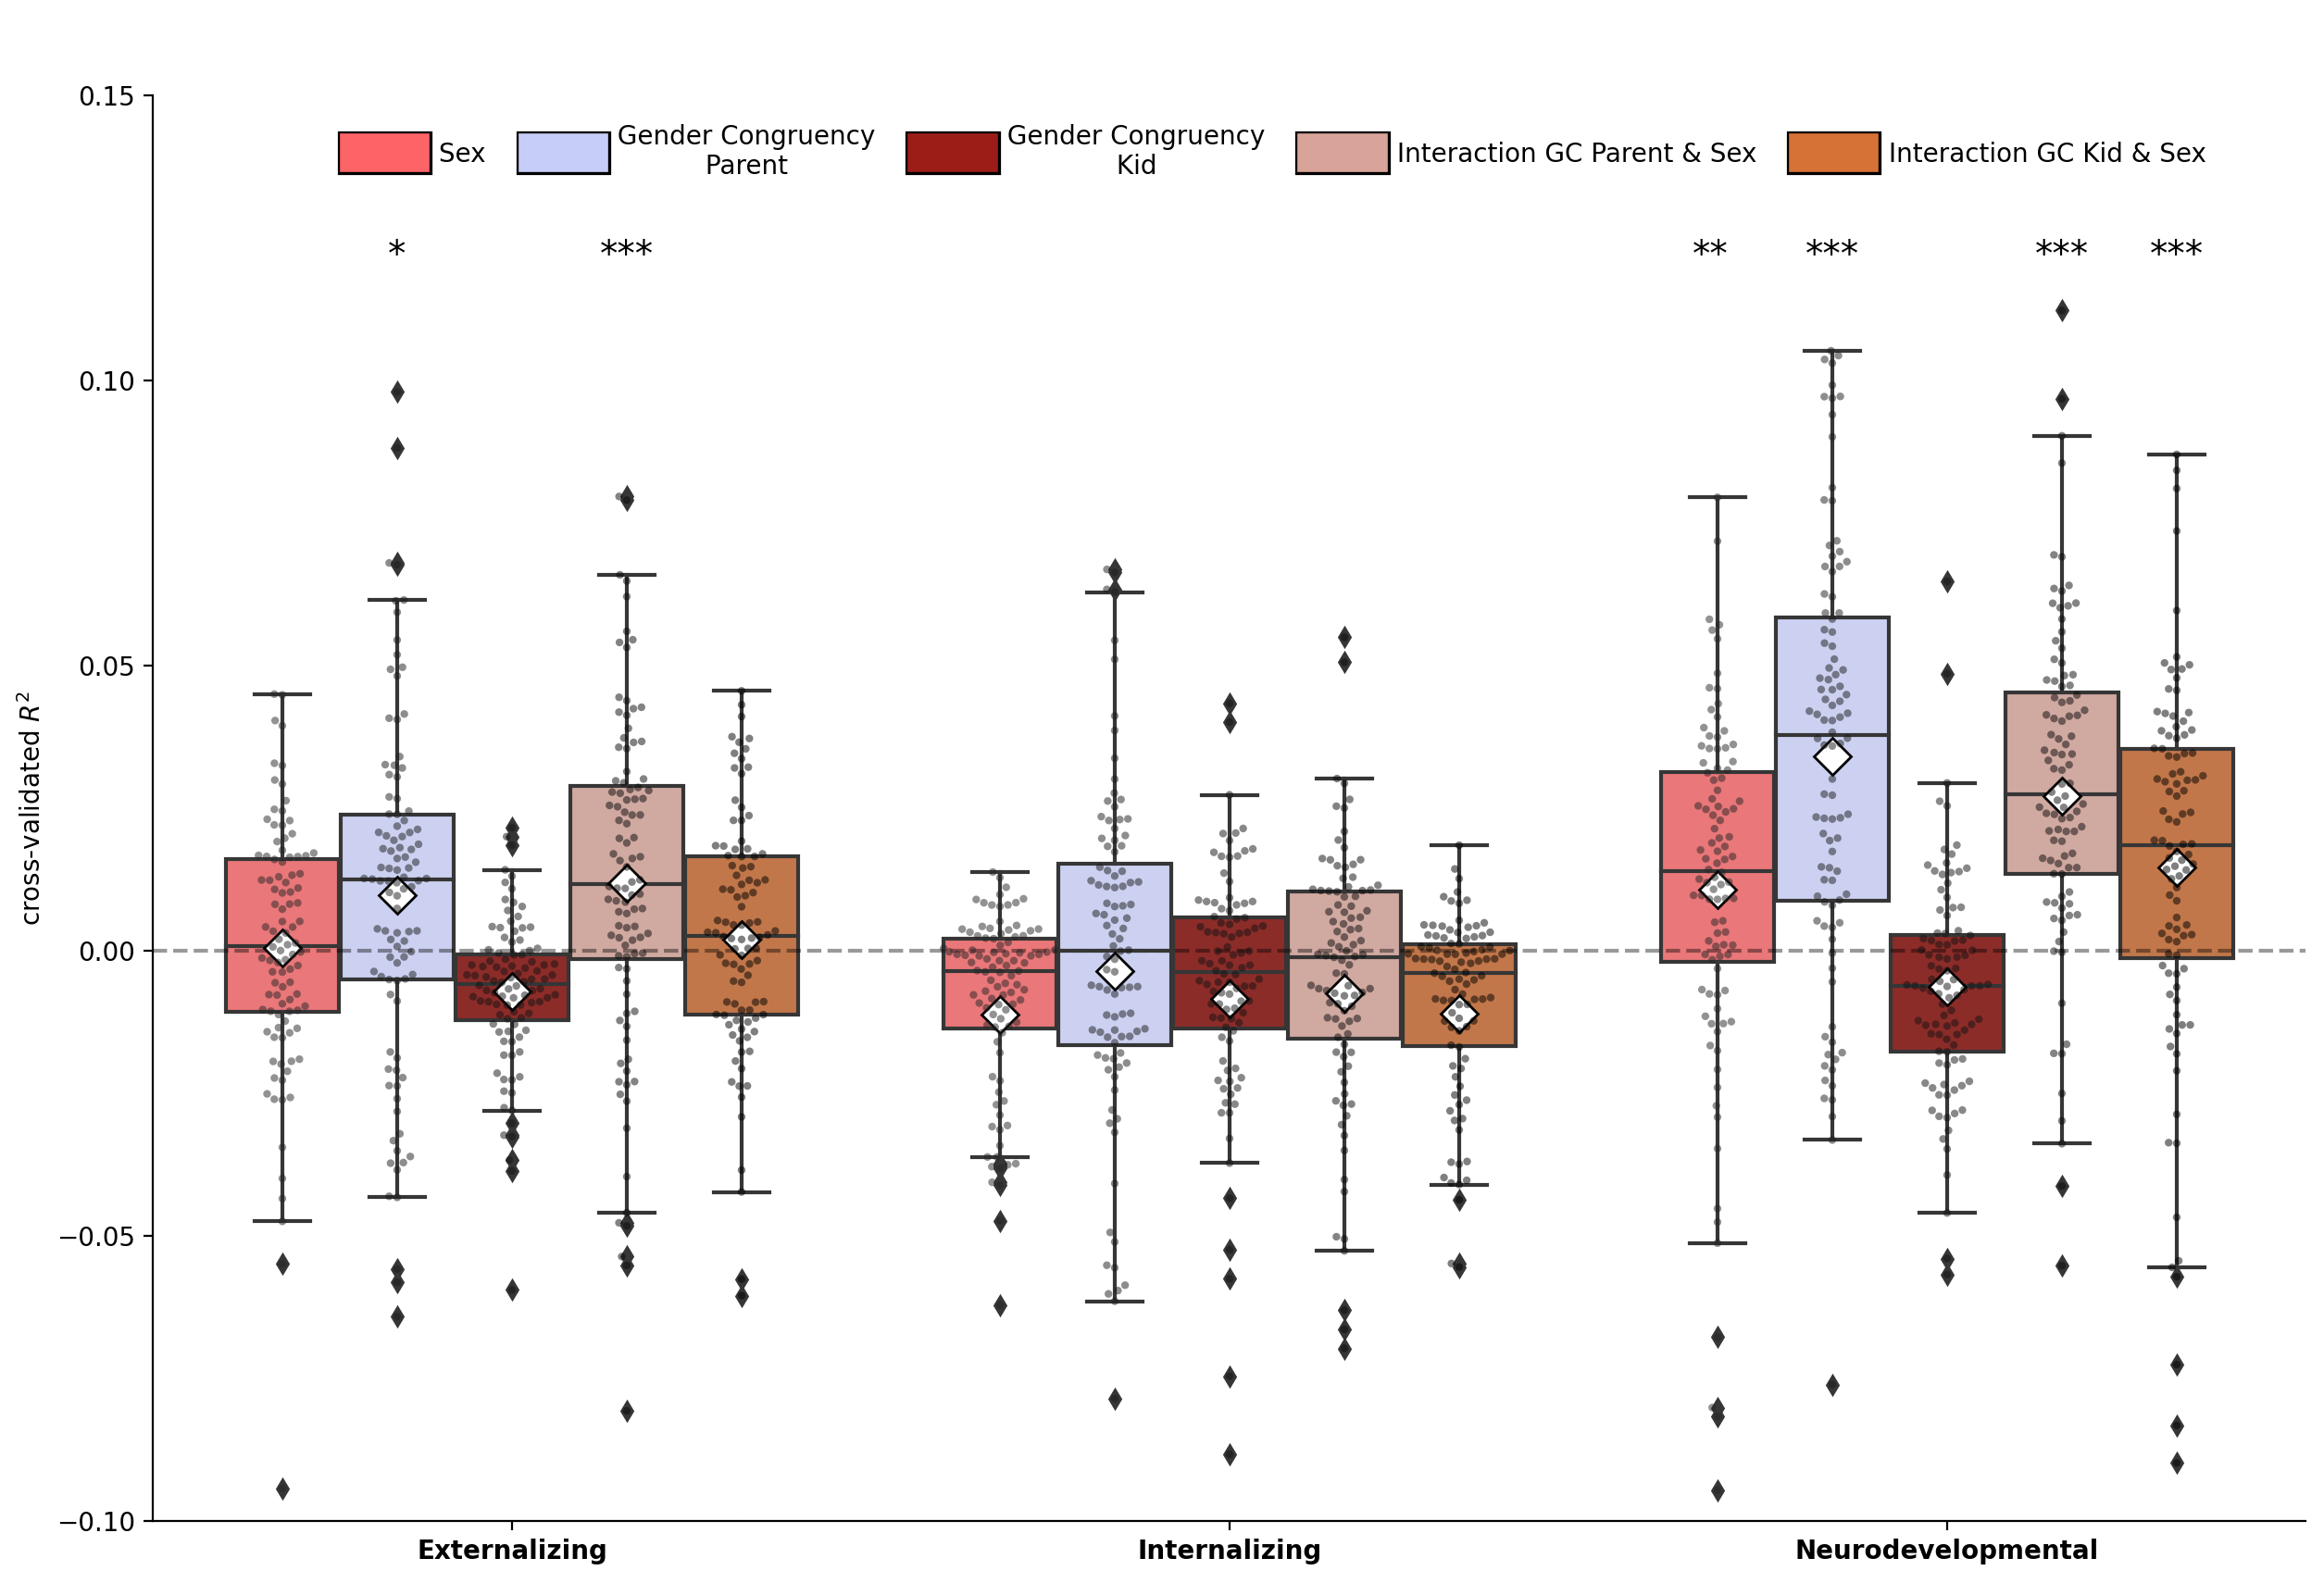

In [41]:
# with interaction
result_df_main = full_result_df

fig,axs = plt.subplots(1,figsize=(15, 10))

sns.swarmplot(
    data=result_df_main,
    x="Factor",
    y="R^2",
    hue="Predictor",
    color="k",
    size=3,
    alpha=.5,
    ax=axs,
    dodge=True,
)

sns.boxplot(
    data=result_df_main,
    x="Factor",
    y="R^2",
    hue="Predictor",
    ax=axs,
    showmeans=True,
    palette= cmap,
    meanprops={"marker":"D","markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"}
)

axs.get_legend().remove()
axs.set_xlabel("")
axs.set_ylabel(r"cross-validated $R^2$")
axs.axhline(y=0,color = 'k',linestyle = '--',alpha=.4)
axs.set_ylim(-.1, .15)

axs.text(x = -0.16, y= 0.12, s= '*', fontsize = 14, horizontalalignment = 'center')
axs.text(x = 0.16, y= 0.12, s= '***', fontsize = 14, horizontalalignment = 'center')
axs.text(x = 1.67, y= 0.12, s= '**', fontsize = 14, horizontalalignment = 'center')
axs.text(x = 1.84, y= 0.12, s= '***', fontsize = 14, horizontalalignment = 'center')
axs.text(x = 2.16, y= 0.12, s= '***', fontsize = 14, horizontalalignment = 'center')
axs.text(x = 2.32, y= 0.12, s= '***', fontsize = 14, horizontalalignment = 'center')



axs.set_xticklabels(axs.get_xticklabels(), fontdict={'weight':'bold'})

custom_legend_lines = [Line2D([0], [0], color=x, lw=15, path_effects=[pe.Stroke(linewidth=17, foreground='k'), pe.Normal()]) for x in cmap]
legend = fig.legend(custom_legend_lines, [" Sex"," Gender Congruency\n Parent"," Gender Congruency\n Kid", " Interaction GC Parent & Sex", " Interaction GC Kid & Sex"], loc=(.15,.88),ncol=5,frameon=False)
for t in legend.get_texts():
    t.set_ha('center')

# save the plot
plt.savefig("final_results/boxplots_baseline_interaction.svg")

### Without Interaction

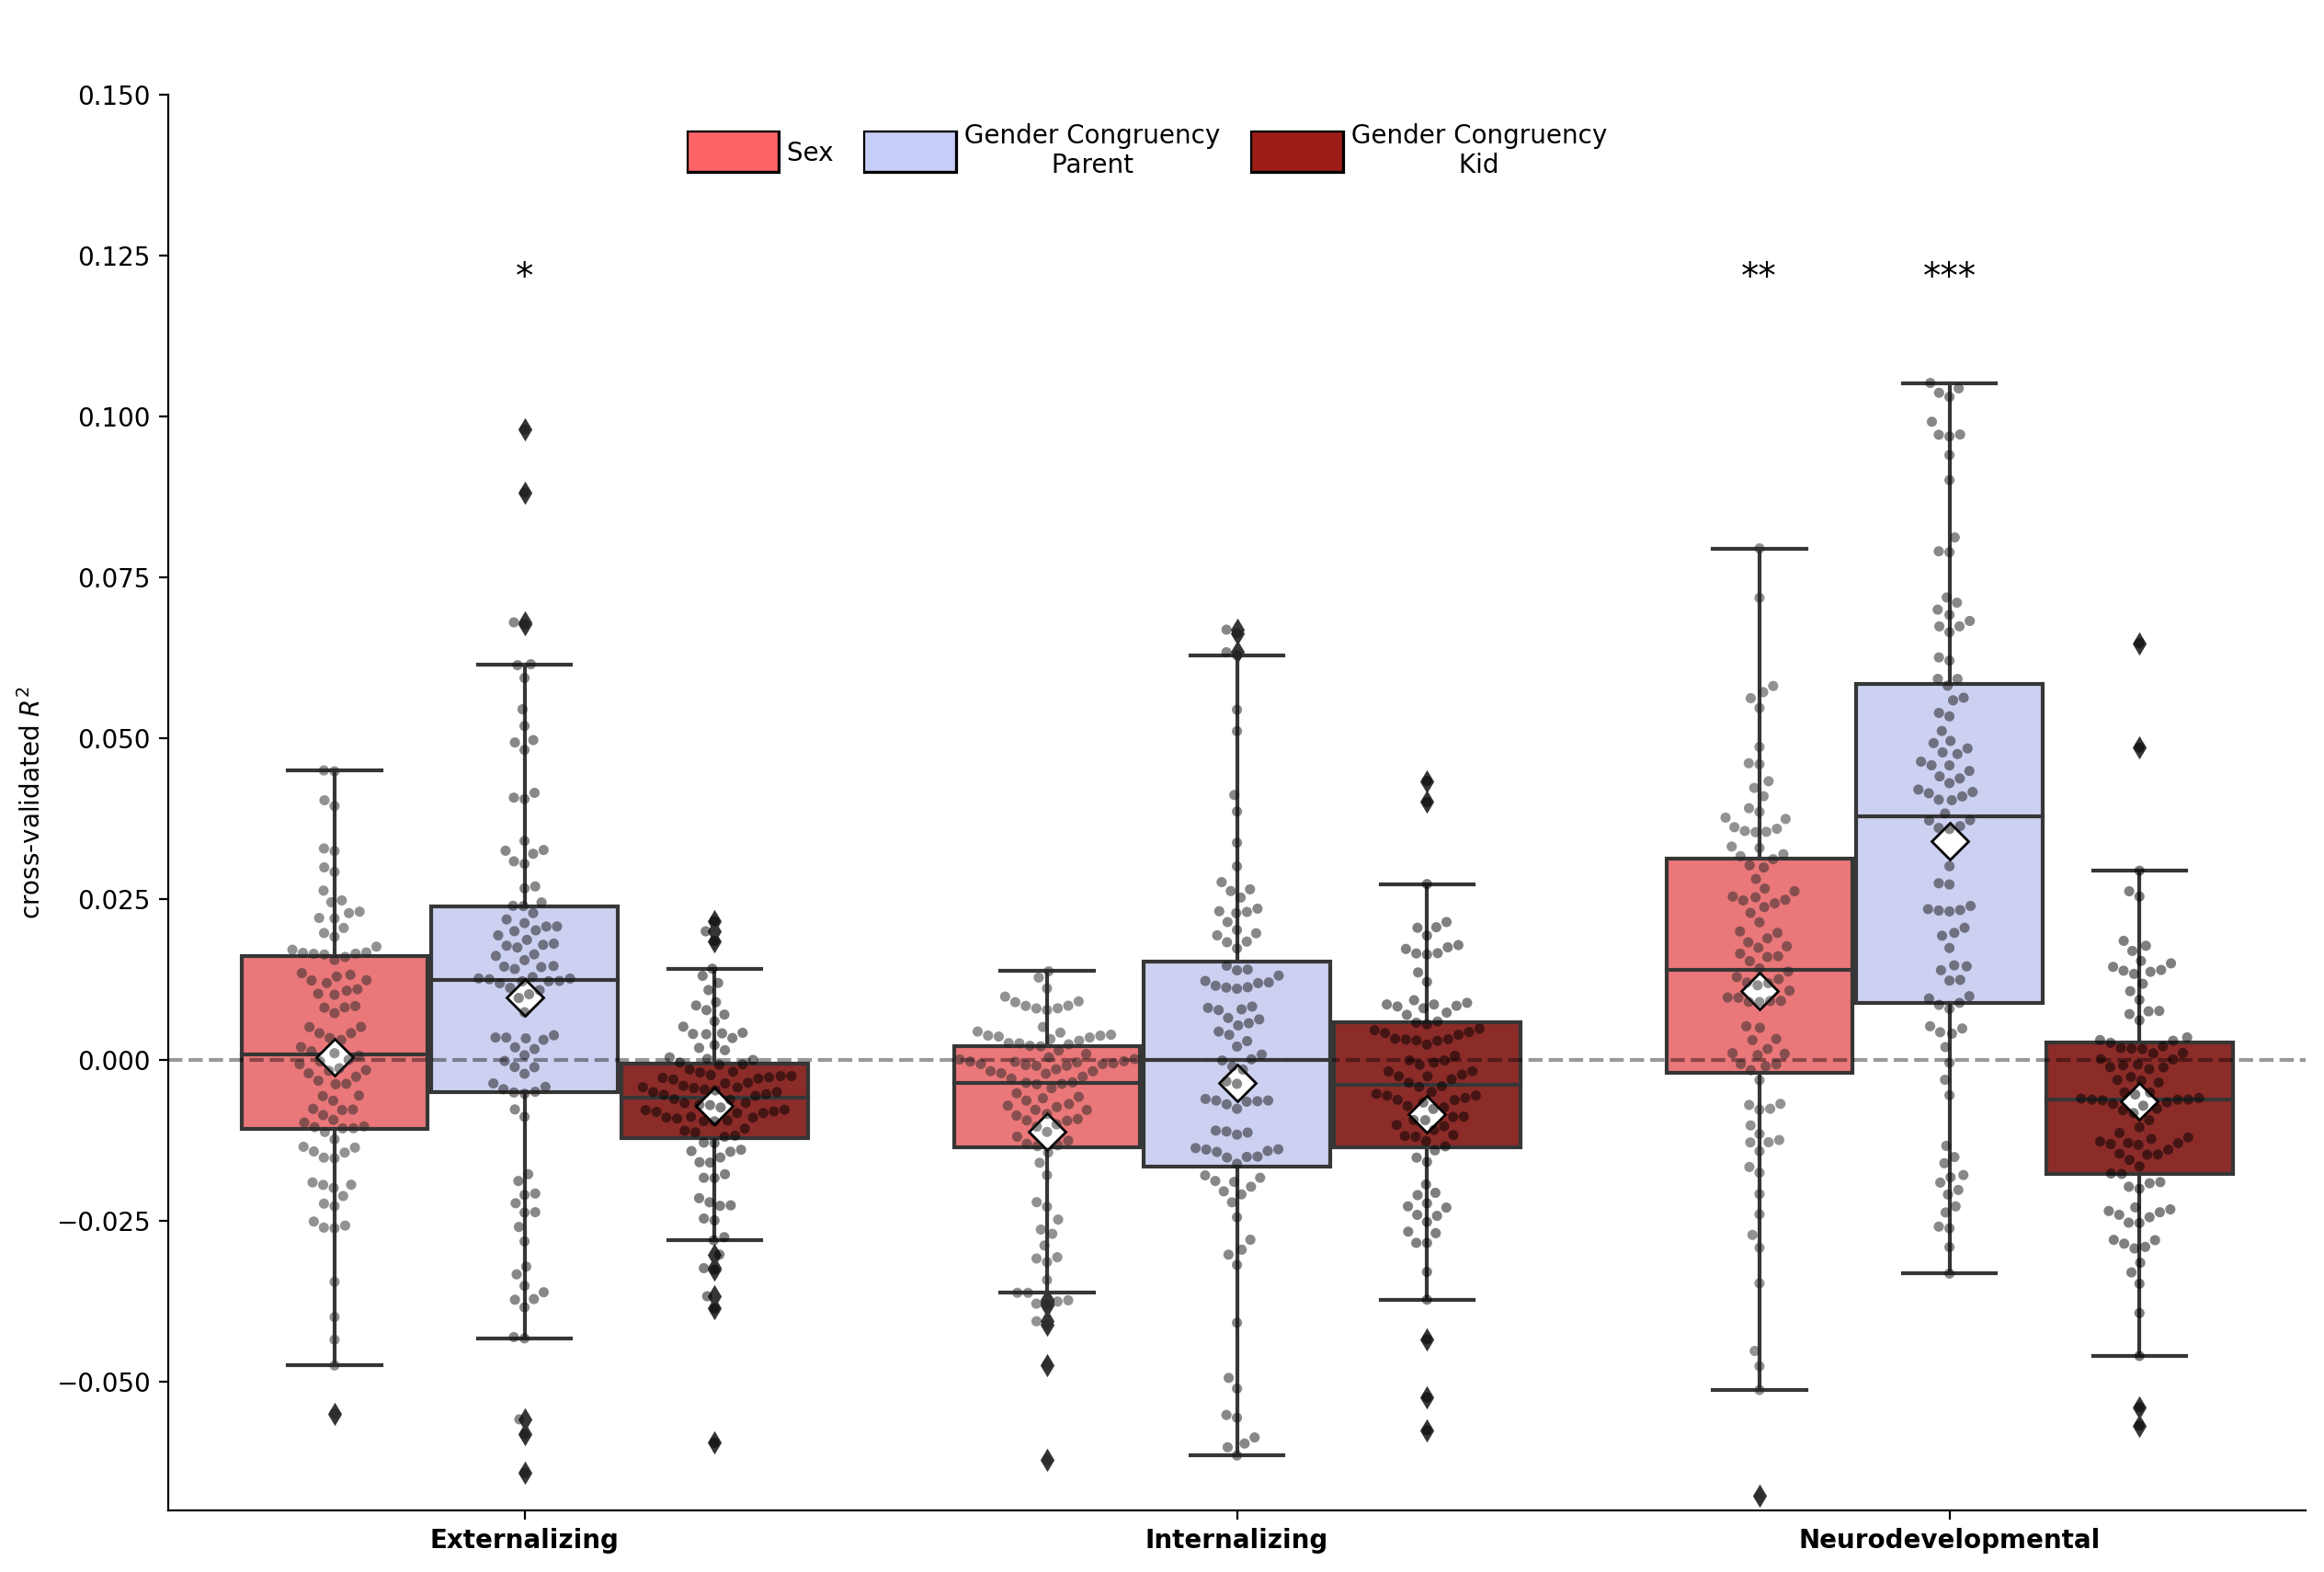

In [42]:
result_df_main = full_result_df[~full_result_df.Predictor.str.contains("&")]

fig,axs = plt.subplots(1,figsize=(15, 10))

sns.swarmplot(
    data=result_df_main,
    x="Factor",
    y="R^2",
    hue="Predictor",
    color="k",
    size=4,
    alpha=.5,
    ax=axs,
    dodge=True,
)

sns.boxplot(
    data=result_df_main,
    x="Factor",
    y="R^2",
    hue="Predictor",
    ax=axs,
    showmeans=True,
    meanprops={"marker":"D","markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"}
)

axs.get_legend().remove()
axs.set_xlabel("")
axs.set_ylabel(r"cross-validated $R^2$")
axs.axhline(y=0,color = 'k',linestyle = '--',alpha=.4)
axs.set_ylim(-.07, .15)

axs.text(x = 0, y= 0.12, s= '*', fontsize = 14, horizontalalignment = 'center')
axs.text(x = 1.7325, y= 0.12, s= '**', fontsize = 14, horizontalalignment = 'center')
axs.text(x = 2, y= 0.12, s= '***', fontsize = 14, horizontalalignment = 'center')

axs.set_xticklabels(axs.get_xticklabels(), fontdict={'weight':'bold'})

custom_legend_lines = [Line2D([0], [0], color=x, lw=15, path_effects=[pe.Stroke(linewidth=17, foreground='k'), pe.Normal()]) for x in cmap]
legend = fig.legend(custom_legend_lines, [" Sex"," Gender Congruency\n Parent"," Gender Congruency\n Kid"], loc=(.3,.88),ncol=3,frameon=False)
for t in legend.get_texts():
    t.set_ha('center')

# save the plot
plt.savefig("final_results/boxplot_baseline.svg")


## Permutation Tests

In [198]:
# run permutations to show that the models actually predict stuff 
from sklearn.model_selection import permutation_test_score

y = gb_factor_scores.sort_values(by=['src_subject_id'])
y_df = y.rename(columns = {0: 'Externalizing', 1: 'Internalizing', 
                           2: 'Neurodevelopmental', 3: 'Detachment',
                           4: 'Somatoform', 5: 'Antisocial Behavior'})

permutation_result = []

predictor_dict = {'Sex':sex_X, 
                  'Gender Congruency - Parent': gender_adult_X, 
                  'Gender Congruency - Kid': gender_kid_X}

for factor in factor_list:

    for predictor in predictor_dict:
        real, permutations , p = permutation_test_score(LinearRegression(), 
                                             predictor_dict[predictor],
                                             y=y_df[factor],cv=100,n_permutations=1000,
                                             n_jobs=-1)
        
        # Bonferroni correction
        p_adj = p * 9
        current_list = []
        current_list = [factor, predictor, p, p_adj]
        permutation_result.append(current_list)
        
        print(f'Finished {factor} with this predictor: {predictor}.')

permutation_result

Finished Externalizing with this predictor: Sex.
Finished Externalizing with this predictor: Gender Congruency - Parent.
Finished Externalizing with this predictor: Gender Congruency - Kid.
Finished Internalizing with this predictor: Sex.
Finished Internalizing with this predictor: Gender Congruency - Parent.
Finished Internalizing with this predictor: Gender Congruency - Kid.
Finished Neurodevelopmental with this predictor: Sex.
Finished Neurodevelopmental with this predictor: Gender Congruency - Parent.
Finished Neurodevelopmental with this predictor: Gender Congruency - Kid.


[['Externalizing', 'Sex', 0.000999000999000999, 0.008991008991008992],
 ['Externalizing',
  'Gender Congruency - Parent',
  0.000999000999000999,
  0.008991008991008992],
 ['Externalizing',
  'Gender Congruency - Kid',
  0.00999000999000999,
  0.0899100899100899],
 ['Internalizing', 'Sex', 0.7312687312687313, 6.581418581418581],
 ['Internalizing',
  'Gender Congruency - Parent',
  0.000999000999000999,
  0.008991008991008992],
 ['Internalizing',
  'Gender Congruency - Kid',
  0.0999000999000999,
  0.8991008991008991],
 ['Neurodevelopmental', 'Sex', 0.000999000999000999, 0.008991008991008992],
 ['Neurodevelopmental',
  'Gender Congruency - Parent',
  0.000999000999000999,
  0.008991008991008992],
 ['Neurodevelopmental',
  'Gender Congruency - Kid',
  0.002997002997002997,
  0.026973026973026972]]

In [334]:
permutation_df = pd.DataFrame (permutation_result, columns = ['Factor', 'Predictor', 'p-value', 'adj. p-value'])
permutation_df['adj. p-value'] = permutation_df['adj. p-value'].apply(display_p_val) 

# export results 
permutation_df.to_latex(buf= 'final_results/Permutation_results.tex')
permutation_df.to_csv('final_results/Permutation_results', index=False)

permutation_df

/var/folders/sk/_dzt21lj39qgwpf96_02xs8h0000gp/T/ipykernel_18654/3083307818.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  permutation_df.to_latex(buf= 'results/Permutation_results.tex')
